In [119]:
# data analysis and wrangling
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, linear_model
from sklearn import model_selection
from sklearn.metrics import accuracy_score # accuracy      #mes  --> linerregression    accuracy_score --> classification, LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
import custom_mglearn
import seaborn as sns
import random as rnd
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier





In [120]:
data_df = pd.read_csv('titanic.csv')
data_df

# PassengerId : 탑승객의 ID(인덱스와 같은 개념)
# Survived : 생존유무(0은 사망 1은 생존)
# Pclass : 객실의 등급
# Name : 이름
# Sex :성별
# SibSp : 동승한 형제 혹은 배우자의 수
# Parch : 동승한 자녀 혹은 부모의 수
# Ticket : 티켓번호
# Fare : 요금
# Cabin : 선실
# Embarked : 탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
#사망자/생존자 수 비교
data_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [83]:
data_df[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


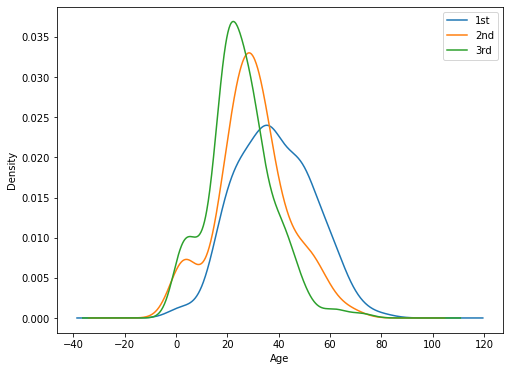

In [84]:
#age + pclass
plt.figure(figsize = (8,6))
data_df['Age'][data_df['Pclass']==1].plot(kind='kde')
data_df['Age'][data_df['Pclass']==2].plot(kind='kde')
data_df['Age'][data_df['Pclass']==3].plot(kind='kde')

plt.xlabel('Age')
plt.legend(['1st','2nd','3rd'])
plt.show()

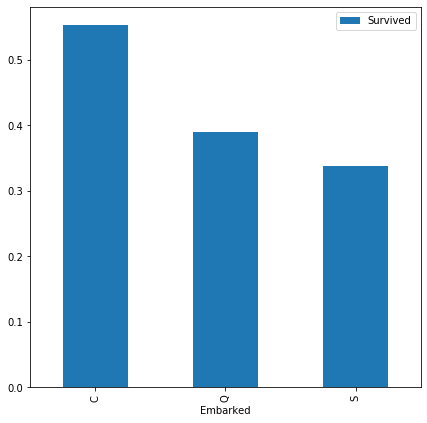

In [85]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
data_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)
plt.show()

In [86]:
data_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [87]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [data_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
data_df =data_df.drop(['Cabin'], axis=1)


In [88]:
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,8
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,8
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,3


In [89]:
data = [data_df]

for dataset in data:
    mean = data_df["Age"].mean()
    std = data_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = data_df["Age"].astype(int)
data_df["Age"].isnull().sum()

0

In [90]:
data_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [91]:
common_value = 'S'
data = [data_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [92]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Deck           891 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 83.7+ KB


In [93]:
data = [data_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [94]:
data = [data_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
data_df = data_df.drop(['Name'], axis=1)

In [95]:
data_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Title
0,1,0,3,male,22,1,0,A/5 21171,7,S,8,1
1,2,1,1,female,38,1,0,PC 17599,71,C,3,3
2,3,1,3,female,26,0,0,STON/O2. 3101282,7,S,8,2
3,4,1,1,female,35,1,0,113803,53,S,3,3
4,5,0,3,male,35,0,0,373450,8,S,8,1


In [96]:
data_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [97]:
data_df = data_df.drop(['Ticket'], axis = 1)

In [98]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [data_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [99]:
data = [data_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

In [100]:
data = [data_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [101]:
data = [data_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
data_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [102]:
data = [data_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [103]:
data = [data_df]

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
data_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone,Age_Class,Fare_Per_Person
0,1,0,3,male,2,1,0,0,0,8,1,1,0,6,0
1,2,1,1,female,5,1,0,3,1,3,3,1,0,5,1
2,3,1,3,female,3,0,0,0,0,8,2,0,1,9,0
3,4,1,1,female,5,1,0,3,0,3,3,1,0,5,1
4,5,0,3,male,5,0,0,1,0,8,1,0,1,15,1
5,6,0,3,male,6,0,0,1,2,8,1,0,1,18,1
6,7,0,1,male,6,0,0,3,0,5,1,0,1,6,3
7,8,0,3,male,0,3,1,2,0,8,4,4,0,0,0
8,9,1,3,female,3,0,2,1,0,8,3,2,0,9,0
9,10,1,2,female,1,1,0,2,1,8,3,1,0,2,1


In [10]:
del data_df['Name']
del data_df['Ticket']
del data_df['PassengerId']
del data_df['Cabin']

In [104]:
for n in range(0,len(data_df)):
    if data_df['Sex'][n] == 'male':
        data_df['Sex'][n] = 1
    elif data_df['Sex'][n] == 'female':
        data_df['Sex'][n]= 0
data_df = data_df.dropna(axis = 0)
data_df = data_df.reset_index(drop=True)

In [105]:
data_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone,Age_Class,Fare_Per_Person
0,1,0,3,1,2,1,0,0,0,8,1,1,0,6,0
1,2,1,1,0,5,1,0,3,1,3,3,1,0,5,1
2,3,1,3,0,3,0,0,0,0,8,2,0,1,9,0
3,4,1,1,0,5,1,0,3,0,3,3,1,0,5,1
4,5,0,3,1,5,0,0,1,0,8,1,0,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,3,0,0,1,0,8,5,0,1,6,1
887,888,1,1,0,2,0,0,2,0,2,2,0,1,2,2
888,889,0,3,0,3,1,2,2,0,8,2,3,0,9,0
889,890,1,1,1,3,0,0,2,1,3,1,0,1,3,2


In [12]:
data_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


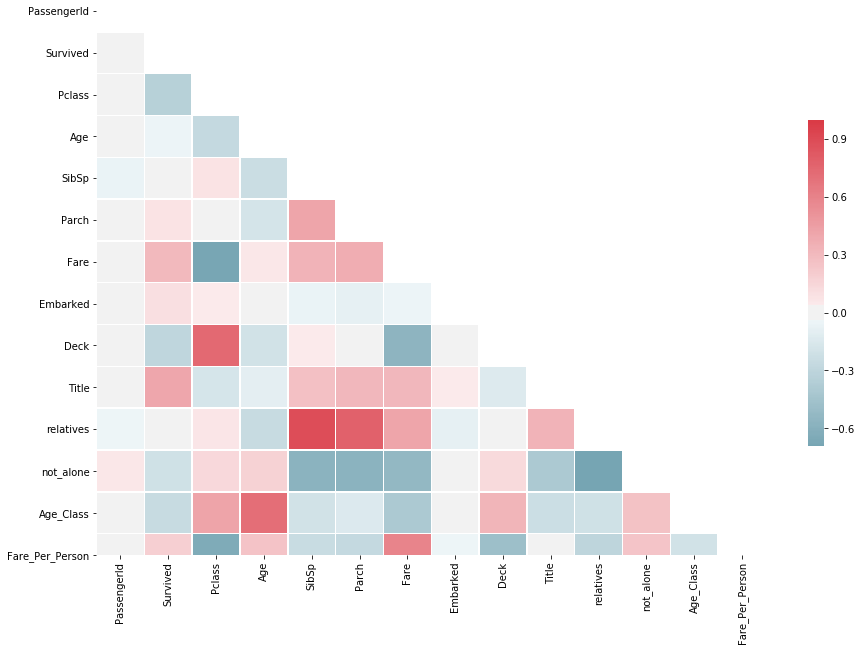

In [106]:
corr = data_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .6});

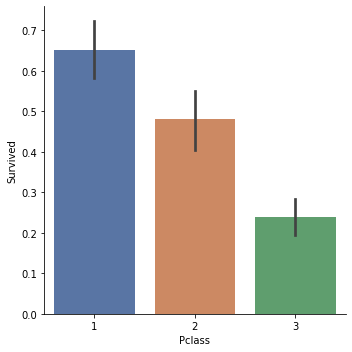

In [16]:
grid = sns.FacetGrid(data_df, size=5)
grid.map(sns.barplot, 'Pclass', 'Survived', palette='deep', order=[1,2,3]);

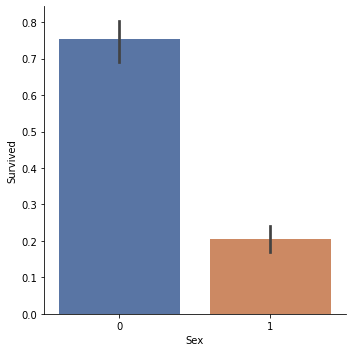

In [17]:
grid = sns.FacetGrid(data_df, size=5)
grid.map(sns.barplot, 'Sex', 'Survived', order=[0,1], palette='deep');

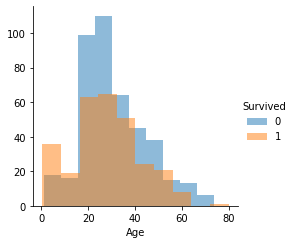

In [18]:
grid = sns.FacetGrid(data_df, hue='Survived', size=3.5)
grid.map(plt.hist, 'Age', alpha=.5)
grid.add_legend();

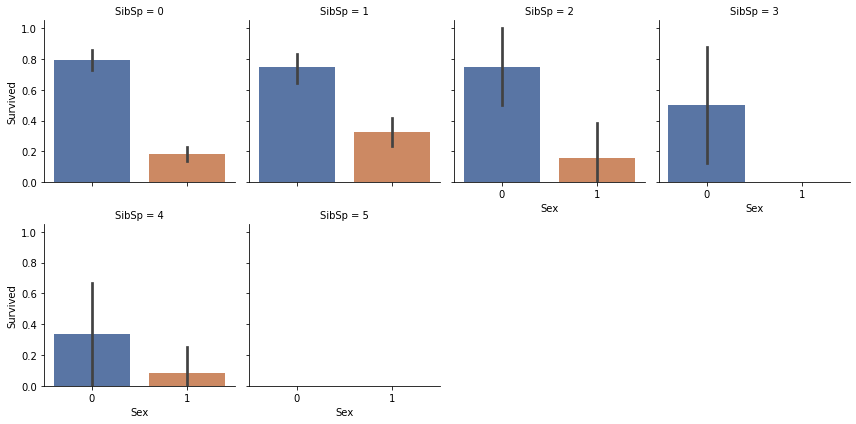

In [158]:
grid = sns.FacetGrid(data_df, col='SibSp', col_wrap=4, size = 3)
grid.map(sns.barplot, 'Sex', 'Survived', order=[0,1],palette='deep');

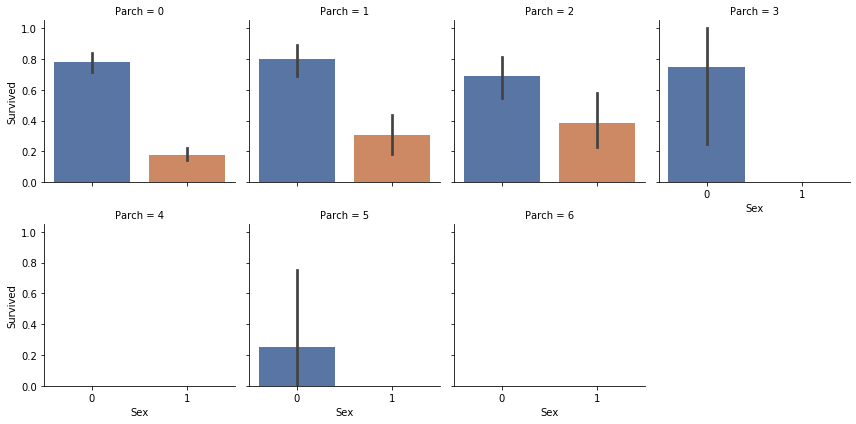

In [157]:
grid = sns.FacetGrid(data_df, col='Parch', col_wrap=4, size = 3)
grid.map(sns.barplot, 'Sex', 'Survived', order=[0,1], palette='deep');

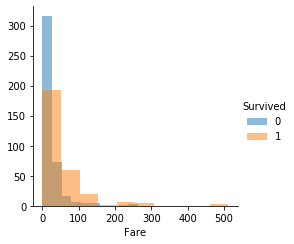

In [167]:
grid = sns.FacetGrid(data_df, hue='Survived', size=3.5)
grid.map(plt.hist, 'Fare', alpha=.5)
grid.add_legend();

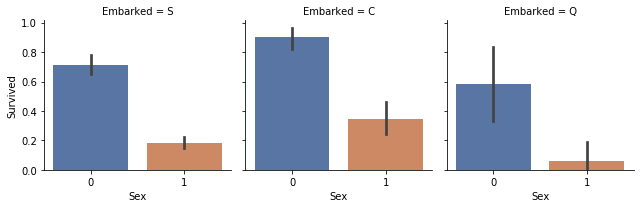

In [156]:
grid = sns.FacetGrid(data_df, col='Embarked', size = 3)
grid.map(sns.barplot, 'Sex', 'Survived', palette='deep', order=[0,1]);

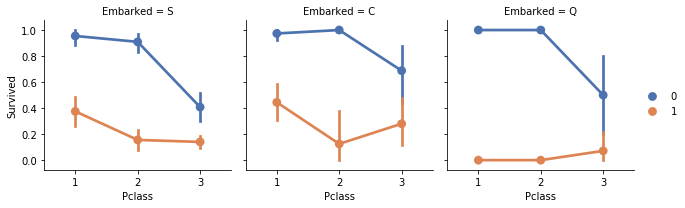

In [160]:
grid = sns.FacetGrid(data_df, col='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=[1,2,3], hue_order=[0,1], palette='deep')
grid.add_legend();

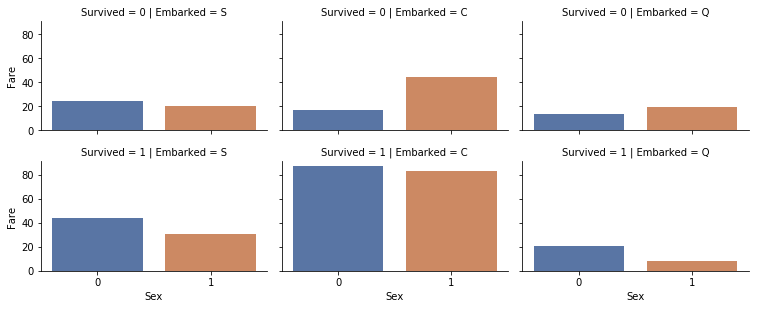

In [161]:
grid = sns.FacetGrid(data_df, row="Survived", col='Embarked', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None, palette='deep')
grid.add_legend()

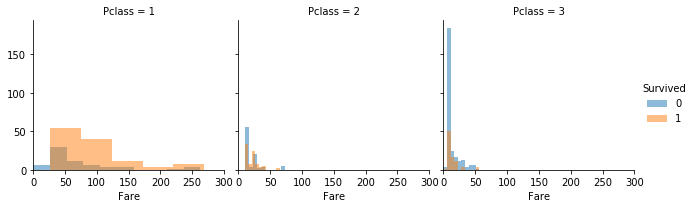

In [162]:
grid = sns.FacetGrid(data_df, col="Pclass", hue="Survived", size=3)
grid.map(plt.hist, "Fare", alpha=.5)
plt.xlim(0,300)
grid.add_legend();

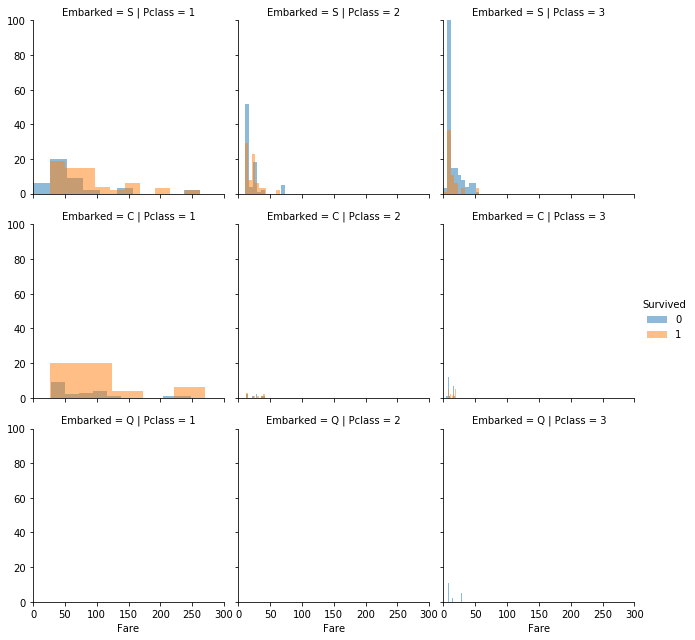

In [163]:
grid = sns.FacetGrid(data_df, col="Pclass", row="Embarked", hue="Survived", size=3)
grid.map(plt.hist, "Fare", alpha=.5)
plt.xlim(0,300)
plt.ylim(0,100)
grid.add_legend();

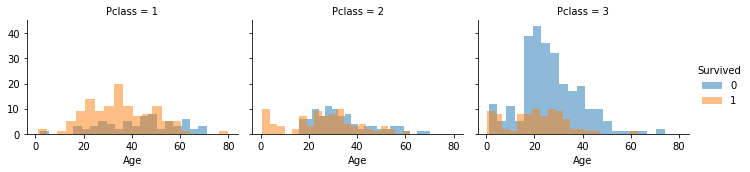

In [164]:
grid = sns.FacetGrid(data_df, col="Pclass", hue="Survived", size=2.5, aspect=1.3)
grid.map(plt.hist, "Age", bins=20, alpha=0.5)
grid.add_legend();

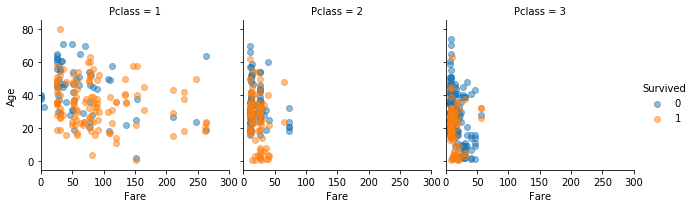

In [166]:
grid = sns.FacetGrid(data_df, col="Pclass", hue="Survived", size=3)
grid.map(plt.scatter, "Fare", "Age", alpha=.5)
plt.xlim(0,300)
grid.add_legend();

In [ ]:
# #Pclass, Sex, Age, SibSp, Parch, Fare, Embarked 변수의 경우 실제로 종속변수인 Survived에 영향을 미쳤다.

# 그리고 몇몇 변수들끼리 서로 강한 상관관계를 가지고 있어서 변수들 간의 결합(차원 축소)이 가능할 것으로 예상한다.

# 이를 확인하기 위해 가장 정확한 방법은 PCA 등의 데이터를 통한 다중공선성을 파악하는 것이 가장 좋겠지만, 여기서는 시간이 없기 때문에 직접 결합을 해보고 차이가 있는지 확인해보도록 하겠다.

# 그리고 Ticket과 Cabin 변수는 영향력을 찾기 어려웠기 때문에 제거할 것이며,

# Age, Fare와 같은 numerical variable은 머신러닝을 위해 임의의 구간으로 잘라서 categorical 변수로 변환할 것이다.

In [110]:
y_data = data_df[['Survived']]   ## 정답지
feature_df = data_df[['Sex','Age','Pclass']]

feature_array = np.array(feature_df)
target_array = np.array(y_data)


x_train, x_test, y_train, y_test = model_selection.train_test_split(feature_array, target_array, test_size=0.3, random_state=0)

In [31]:
model_Logistic = linear_model.LogisticRegression() # 로지스틱회귀

model_Logistic.fit(x_train, y_train)

pred_result_Logistic = model_Logistic.predict(x_test) # Predict

pred_test_Logistic = model.predict_proba(x_test) # Predict 'probability'

print('Accuracy: ', accuracy_score(model_Logistic.predict(x_test), y_test))



Accuracy:  0.7663551401869159


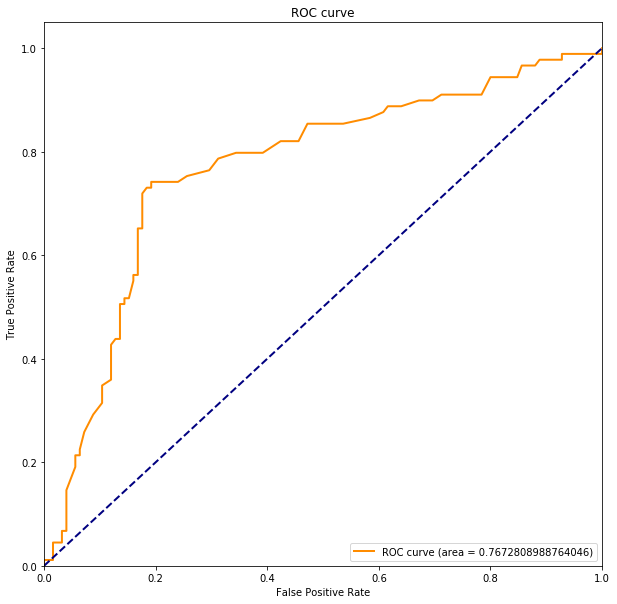

In [32]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test_Logistic[:,1]) # real y & predicted y (based on "Sepal width")             //recall and precision
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {})'.format(roc_auc))
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

In [111]:
model_svc = SVC(kernel='rbf', probability=True)
model_svc.fit(x_train, y_train)

pred_result_svc = model_svc.predict(x_test)

pred_test_svc = model_svc.predict_proba(x_test) # Predict 'probability'


print('Accuracy: ', accuracy_score(model_svc.predict(x_test), y_test))

Accuracy:  0.7947761194029851


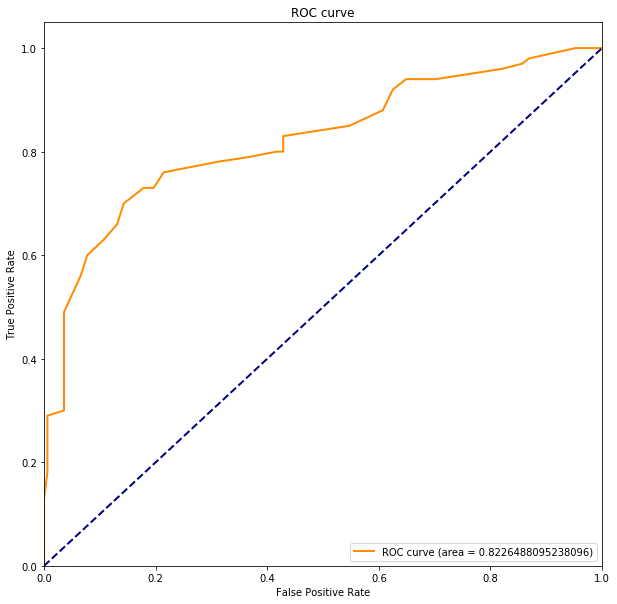

In [112]:
fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test_svc[:,1]) # real y & predicted y (based on "Sepal width")             //recall and precision
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {})'.format(roc_auc))
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()

Accuracy:  0.8097014925373134


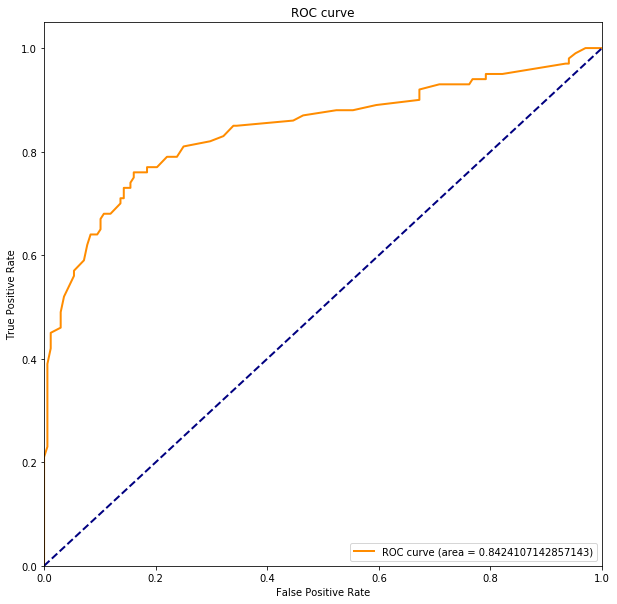

In [118]:
y_data = data_df[['Survived']]   ## 정답지
feature_df = data_df[['Sex','Age','Title']]

feature_array = np.array(feature_df)
target_array = np.array(y_data)


x_train, x_test, y_train, y_test = model_selection.train_test_split(feature_array, target_array, test_size=0.3, random_state=0)

model_svc = SVC(kernel='rbf', probability=True)
model_svc.fit(x_train, y_train)

pred_result_svc = model_svc.predict(x_test)

pred_test_svc = model_svc.predict_proba(x_test) # Predict 'probability'


print('Accuracy: ', accuracy_score(model_svc.predict(x_test), y_test))

fpr, tpr, _ = roc_curve(y_true=y_test, y_score=pred_test_svc[:,1]) # real y & predicted y (based on "Sepal width")             //recall and precision
roc_auc = auc(fpr, tpr) # AUC 면적의 값 (수치)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {})'.format(roc_auc))
#plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("ROC curve")

plt.show()